In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
df.isna()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [7]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [8]:
X = df.drop(columns=['Outcome'])
y = df['Outcome']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [9]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [10]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam

In [46]:
model = Sequential()

model.add(Dense(units=256,activation='relu',input_dim=8,kernel_regularizer=tensorflow.keras.regularizers.l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(units=256,activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(units=256,activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l2(0.06)))
model.add(Dropout(0.3))
model.add(Dense(units=1,activation='sigmoid'))

In [47]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 256)               2304      
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 256)               65792     
                                                                 
 dropout_10 (Dropout)        (None, 256)               0         
                                                                 
 dense_14 (Dense)            (None, 256)               65792     
                                                                 
 dropout_11 (Dropout)        (None, 256)               0         
                                                                 
 dense_15 (Dense)            (None, 1)                

In [48]:
adam = Adam(learning_rate = 0.0001)
model.compile(loss='binary_crossentropy' ,optimizer='Adam',metrics=['accuracy'])

In [49]:
callback = EarlyStopping(
    monitor = 'val_loss',
    patience = 20,
    verbose = 1,
    restore_best_weights = True
)

In [50]:
history = model.fit(X_train_scaled,y_train,epochs=500,validation_split=0.2,callbacks=callback)

Epoch 1/500
16/16 [==============================] - 1s 24ms/step - loss: 13.4828 - accuracy: 0.6395 - val_loss: 10.4299 - val_accuracy: 0.6748
Epoch 2/500
16/16 [==============================] - 0s 7ms/step - loss: 8.5315 - accuracy: 0.7067 - val_loss: 6.4780 - val_accuracy: 0.8049
Epoch 3/500
16/16 [==============================] - 0s 7ms/step - loss: 5.2888 - accuracy: 0.7556 - val_loss: 3.9776 - val_accuracy: 0.8374
Epoch 4/500
16/16 [==============================] - 0s 7ms/step - loss: 3.2917 - accuracy: 0.7678 - val_loss: 2.4955 - val_accuracy: 0.8374
Epoch 5/500
16/16 [==============================] - 0s 7ms/step - loss: 2.1051 - accuracy: 0.7719 - val_loss: 1.6229 - val_accuracy: 0.8293
Epoch 6/500
16/16 [==============================] - 0s 7ms/step - loss: 1.4404 - accuracy: 0.7536 - val_loss: 1.1624 - val_accuracy: 0.7967
Epoch 7/500
16/16 [==============================] - 0s 7ms/step - loss: 1.0509 - accuracy: 0.7678 - val_loss: 0.8712 - val_accuracy: 0.7967
Epoch 8/50

In [51]:
y_log = model.predict(X_test_scaled)

5/5 [==============================] - 0s 2ms/step


In [52]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_test,y_log)

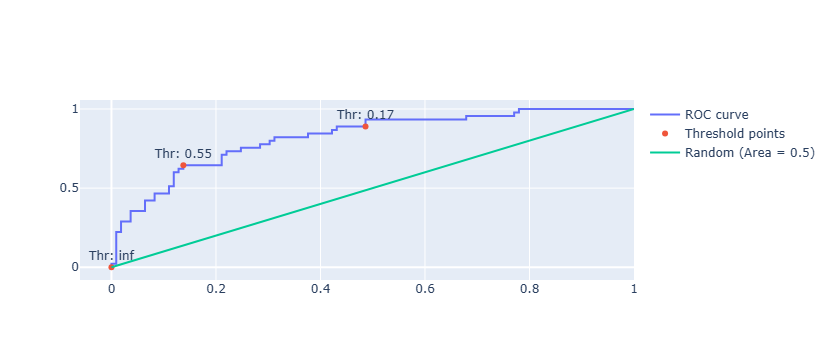

In [53]:
import plotly.graph_objects as go
import numpy as np

# Assuming fpr, tpr, and thresholds are defined here
# For example:
# fpr, tpr, thresholds = some_function_to_compute_roc()

# Generate a trace for ROC curve
trace0 = go.Scatter(
    x=fpr,
    y=tpr,
    mode='lines',
    name='ROC curve'
)

# Only label every nth point to avoid cluttering
n = 19
indices = np.arange(len(thresholds)) % n == 0

trace1 = go.Scatter(
    x=fpr[indices],
    y=tpr[indices],
    mode='markers+text',
    name='Threshold points',
    text=[f"Thr: {thr:.2f}" for thr in thresholds[indices]],
    textposition='top center'
)

# Diagonal line
trace2 = go.Scatter(
    x=[0, 1],
    y=[0, 1],
    mode='lines',
    name='Random (Area = 0.5)'
)


fig = go.Figure()
fig.add_trace(trace0)
fig.add_trace(trace1)
fig.add_trace(trace2)


fig.show()


In [54]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal Thresholds is: ",optimal_threshold)

Optimal Thresholds is:  0.37556148


In [55]:
y_pred = np.where(y_log>optimal_threshold,1,0)
acc = accuracy_score(y_test,y_pred)
print(f"Accuracy: {acc*100:.2f}%")

Accuracy: 75.97%


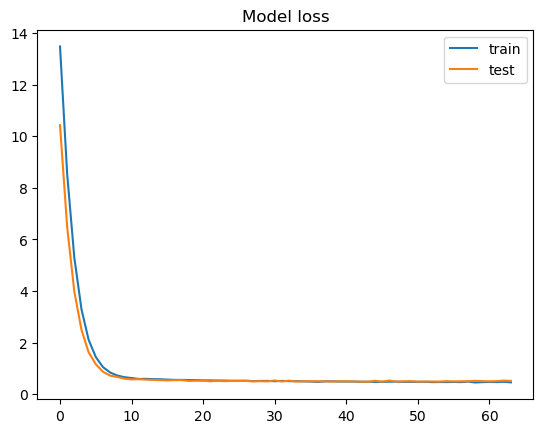

In [56]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model loss')
plt.legend()
plt.show()

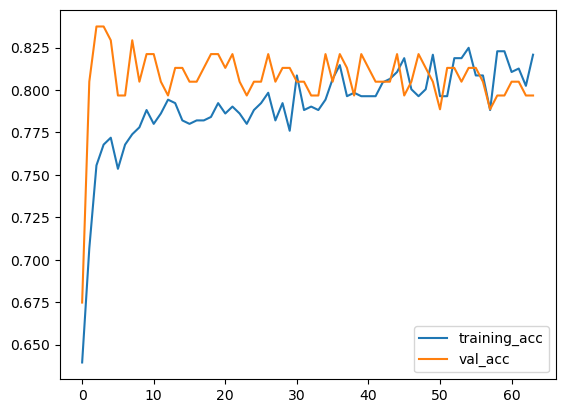

In [57]:
plt.plot(history.history['accuracy'],label='training_acc')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.legend()
plt.show()